In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

## Checking All Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- All data type is ok with respect to their features. 

## EDA

### Checking Null Values

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

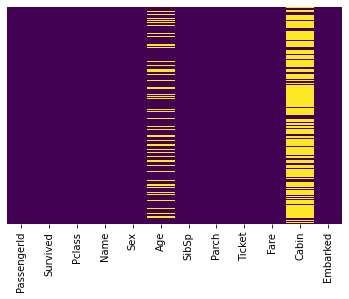

In [7]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

 - There is a null values present in Age, Emabrked And Cabin column.
 - There is 70% data missing in cabin column so i will drop this column while feature selection.

<AxesSubplot:xlabel='Survived', ylabel='count'>

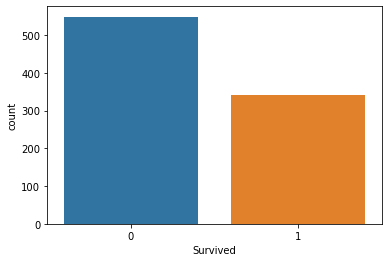

In [8]:
sns.countplot(x='Survived',data=data)

- There is around 500 people are not survived and 310 people are survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

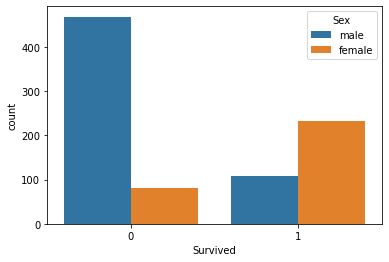

In [9]:
sns.countplot(x='Survived', hue='Sex',data=data)

- We can see, the person whose not survived mostly they are male and less female are died.
- In the survied, most of the female are survived and less male are survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

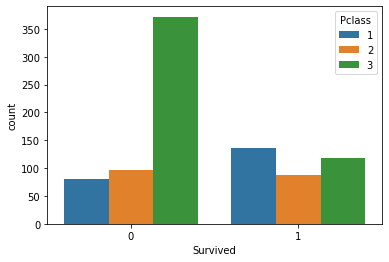

In [10]:
sns.countplot(x='Survived', hue='Pclass',data=data)

 - From Pclass 3 there is a many people are died followed by Pclass 2 and Pclass 1.
 - From Pclass 1, more pople are survived followed by Pclass 3, and Pclass 2.

<AxesSubplot:xlabel='Survived', ylabel='count'>

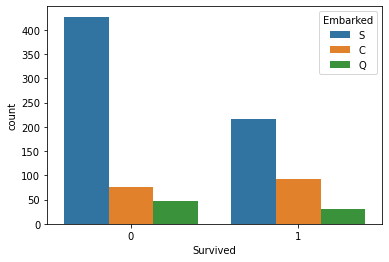

In [11]:
sns.countplot(x='Survived',hue='Embarked',data=data)

 - S is having more chance of death, then c and Q.
 - S is also having more chance to survived followed by C and Q.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

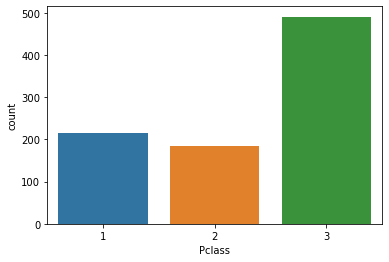

In [12]:
sns.countplot(x='Pclass',data=data)

 - We can see, in Pclass 3 the more people are travel then Pclass 1 and Pclass 2.

<AxesSubplot:xlabel='Sex', ylabel='count'>

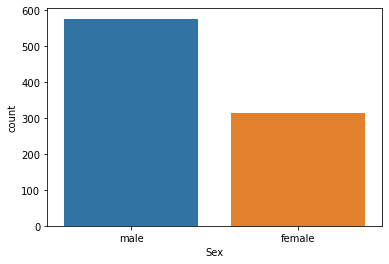

In [13]:
sns.countplot(x='Sex',data=data)

- The male are more survived then female.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

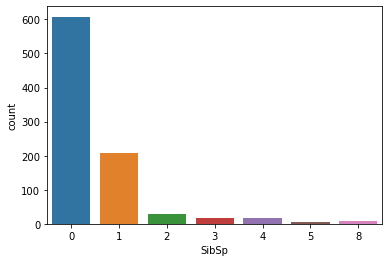

In [14]:
sns.countplot(x='SibSp',data=data)

- There is around 600 people whose dont have SibSp.
- The 1 is show that, there is possibility that people whose travel with thire spouse.
- After 2 it show that, there is have 1,2,3 and 4 SibSp.
 

<AxesSubplot:xlabel='Parch', ylabel='count'>

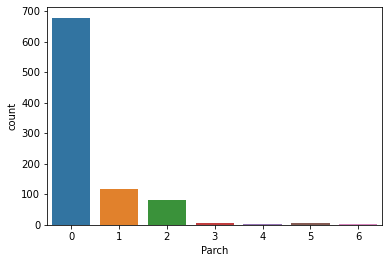

In [15]:
sns.countplot(x='Parch',data=data)

 - There are > 650 people whose dont have Parch.
 - After 0 it show that, there is have 1,2 and 3 Parch.

<AxesSubplot:xlabel='Age', ylabel='Density'>

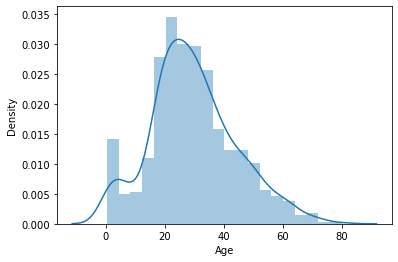

In [16]:
sns.distplot(data['Age'])

 - Age followed nearly followed normal distributio

####  Survived with respect to age

<AxesSubplot:xlabel='Age', ylabel='Density'>

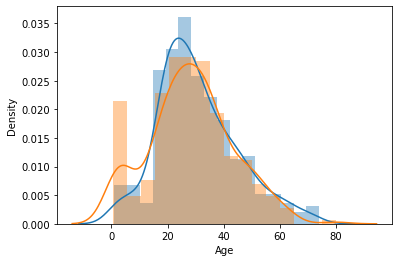

In [17]:

sns.distplot(data[data['Survived']==0]['Age'])
sns.distplot(data[data['Survived']==1]['Age'])

 - In the lower age, there is low chance of died then survived.
 - 15 to 35 in this range, the chance of died is high.
 - 35 to onwords , threr is having more chace of survived.

<AxesSubplot:xlabel='Age'>

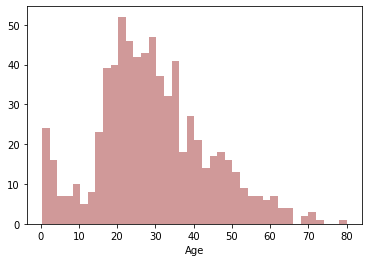

In [18]:
sns.distplot(data['Age'].dropna(),color='darkred',kde=False, bins=40)

- There is maximum people are lies in the range 17 to 40.
- There is less people from 60 to 80 range.

<AxesSubplot:>

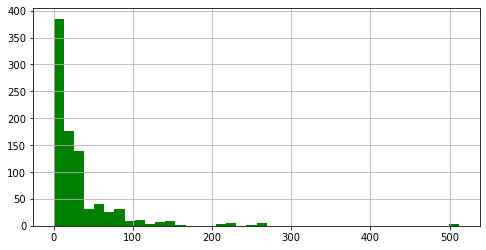

In [19]:
data['Fare'].hist(color='green',bins=40, figsize=(8,4))

 - We can see, 0 to 100 fare whose bought the ticket.

## Filling Null Values

In [20]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
## In this there is only 2 Null values are present so i am filling this values with that value which is repeating more time. i.e. s 
data['Embarked'].fillna('S',inplace=True)

In [22]:
# Filling Age with taking mean of all age.
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [23]:
# i simply drop this column becouse it have more than 70% of null values.
data.drop(columns=['Cabin'],inplace=True)

In [24]:
# I am alos drop Name and Ticket Features
data.drop(columns=['Name','Ticket'],inplace=True)

In [25]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [26]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

 - After filling null values, No null values are present.

### Making New Feature Family_type

In [27]:
data['Family_size'] = data['Parch'] + data['SibSp']

In [28]:
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,1


In [29]:
def family_type(num):
    if num ==0:
        return 'Alone'
    elif num > 0 and num <= 4:
        return 'Medium'
    else:
        return 'Large'

In [30]:
data['Family_type'] = data['Family_size'].apply(family_type)

In [31]:
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Family_type
0,1,0,3,male,22.0,1,0,7.2500,S,1,Medium
1,2,1,1,female,38.0,1,0,71.2833,C,1,Medium


In [32]:
data.drop(columns=['SibSp','Parch','Family_size'],inplace=True)

In [33]:
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_type
0,1,0,3,male,22.0,7.2500,S,Medium
1,2,1,1,female,38.0,71.2833,C,Medium


## Encoding the Dataframe

In [34]:
data = pd.get_dummies(data=data, columns=['Pclass','Sex','Embarked','Family_type'], drop_first=True)

In [35]:
data.head()

,PassengerId,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Medium
0,1,0,22.0,7.2500,0,1,1,0,1,0,1
1,2,1,38.0,71.2833,0,0,0,0,0,0,1
2,3,1,26.0,7.9250,0,1,0,0,1,0,0
3,4,1,35.0,53.1000,0,0,0,0,1,0,1
4,5,0,35.0,8.0500,0,1,1,0,1,0,0


## Describe the Dataset

In [36]:
data.describe()

,PassengerId,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Medium
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,32.204208,0.206510,0.551066,0.647587,0.086420,0.725028,0.052750,0.344557
std,257.353842,0.486592,13.002015,49.693429,0.405028,0.497665,0.477990,0.281141,0.446751,0.223659,0.475490
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,29.699118,14.454200,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,668.500000,1.000000,35.000000,31.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


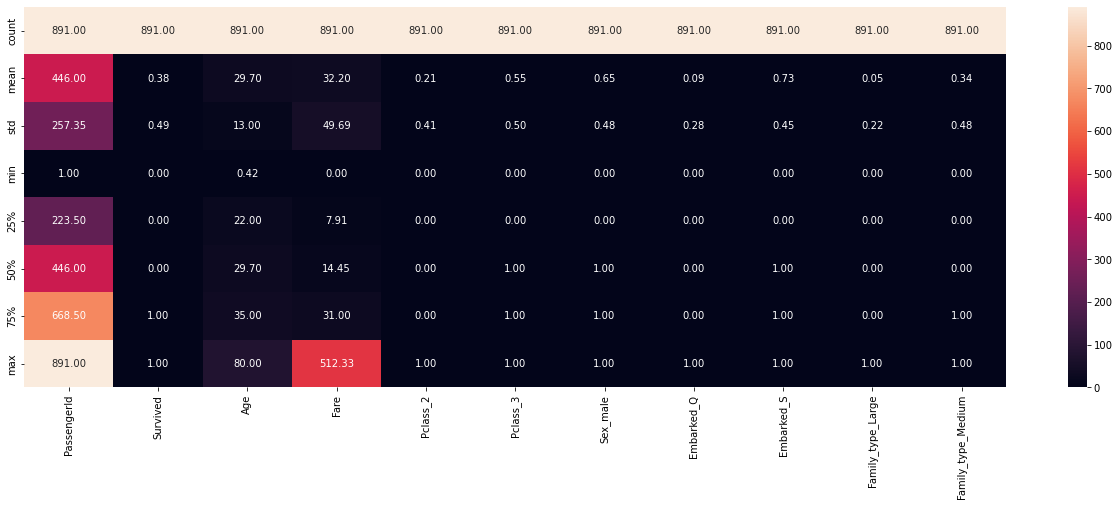

In [37]:
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(), annot=True, fmt="0.2f")
plt.show()

### Outcome of describe of datasets:

From the above plotting we are determining mean, standard deviation, minimum, and maximum value of each column. It helps us further in data cleaning.


Total Number of row in the datasets:
  1. 891 rows
  2. 12 columns
  
 - Age and Fare are having continuos data so i take only this two columns.
  
Age:
  1. Mean = 29.699118
  2. std = 13.002015
  3. max_value = 80.000000
  4. min_value = 0.420000
  
Fare:
  1. Mean = 32.204208	
  2. std = 49.693429
  3. max_value = 512.329200
  4. min_value = 0.000000
  
 - We can see, std is more than mean, even max_value and min_value have big difference.
 - So fare may have right-skewness.

## Correlation of the features with target column

In [38]:
data.corr()['Survived'].sort_values()

Sex_male             -0.543351
Pclass_3             -0.322308
Embarked_S           -0.149683
Family_type_Large    -0.113984
Age                  -0.069809
PassengerId          -0.005007
Embarked_Q            0.003650
Pclass_2              0.093349
Fare                  0.257307
Family_type_Medium    0.263023
Survived              1.000000
Name: Survived, dtype: float64

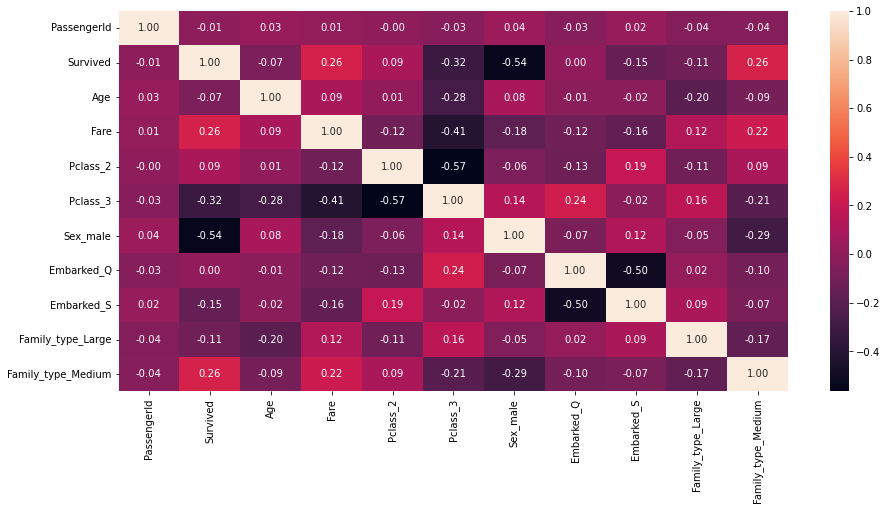

In [39]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation with target column:

  1. Passenger Id has 1% negative correlation with the target column.
  2. Age has 7% negative correlation with the target column.
  3. Fare has 23% positive correlation with the target column.
  4. Pclass 2 has 9% positive correlation with the target column.
  5. Pclass 3 has 32% negative correlation with target column.
  6. Sex_male has 54% negative correlation with target column.
  7. Embarked_Q has 0% correlation with target column.
  8. Embarked_S has 15% negative correlation with target column.
  9. Family_type_large has 11% negative correlation with target column.
  10. Family_type_Medium has 26% positive correlation with target column.
 

## Checking Distribution of Data

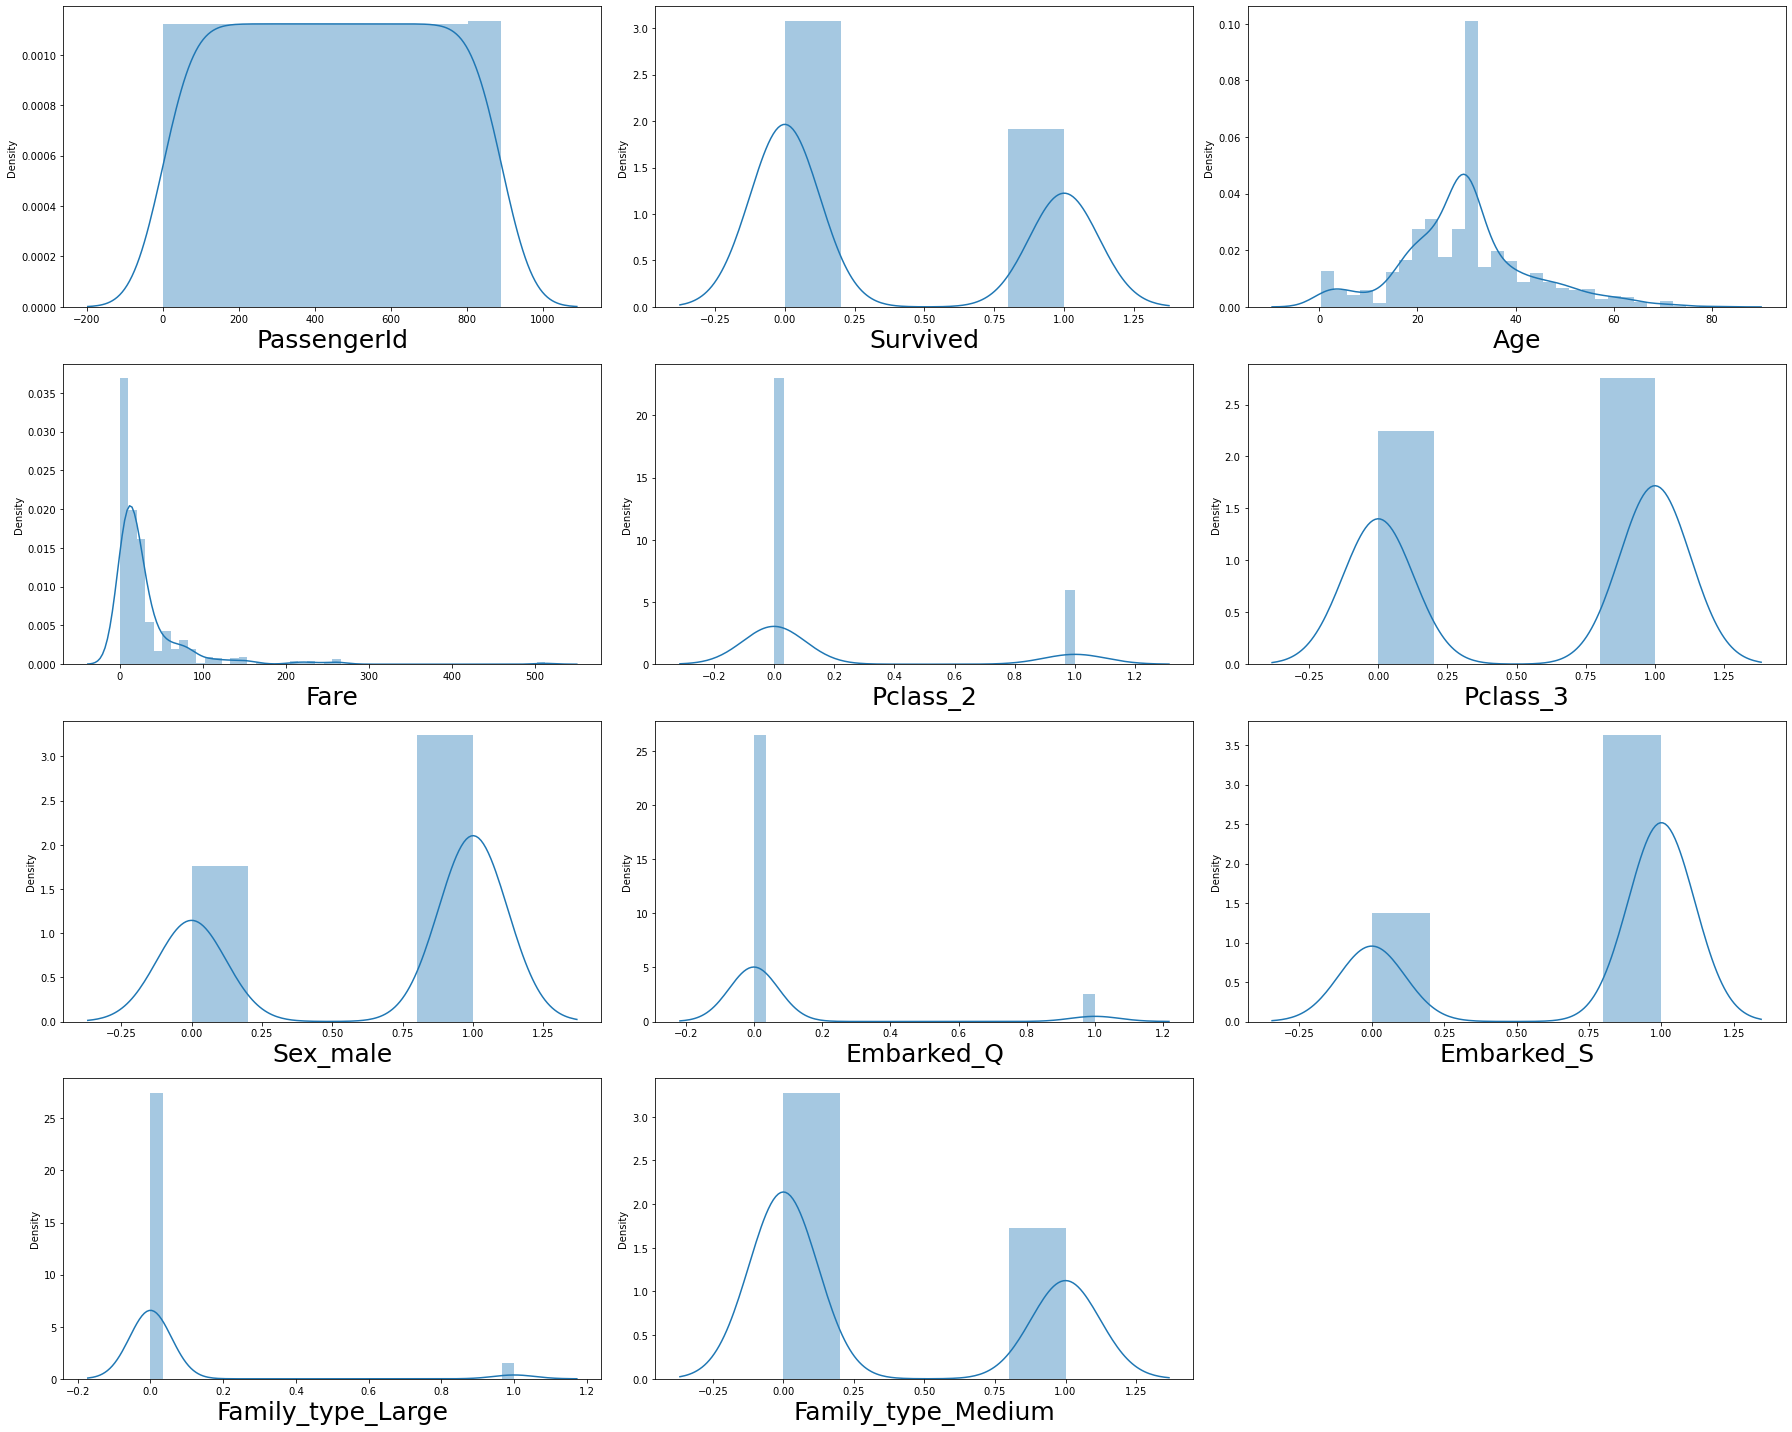

In [40]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=25)
    plotnumber +=1
plt.tight_layout()

In [41]:
data.skew()

PassengerId           0.000000
Survived              0.478523
Age                   0.434488
Fare                  4.787317
Pclass_2              1.452497
Pclass_3             -0.205685
Sex_male             -0.618921
Embarked_Q            2.948778
Embarked_S           -1.009665
Family_type_Large     4.008393
Family_type_Medium    0.655294
dtype: float64

- Outcome of the skewness: Skewness threshold is taken is +/-0.65.
- Fare is having Positive skewness.
- Rest of the all feature is having categorical data so not condisered.


## Checking Outliers

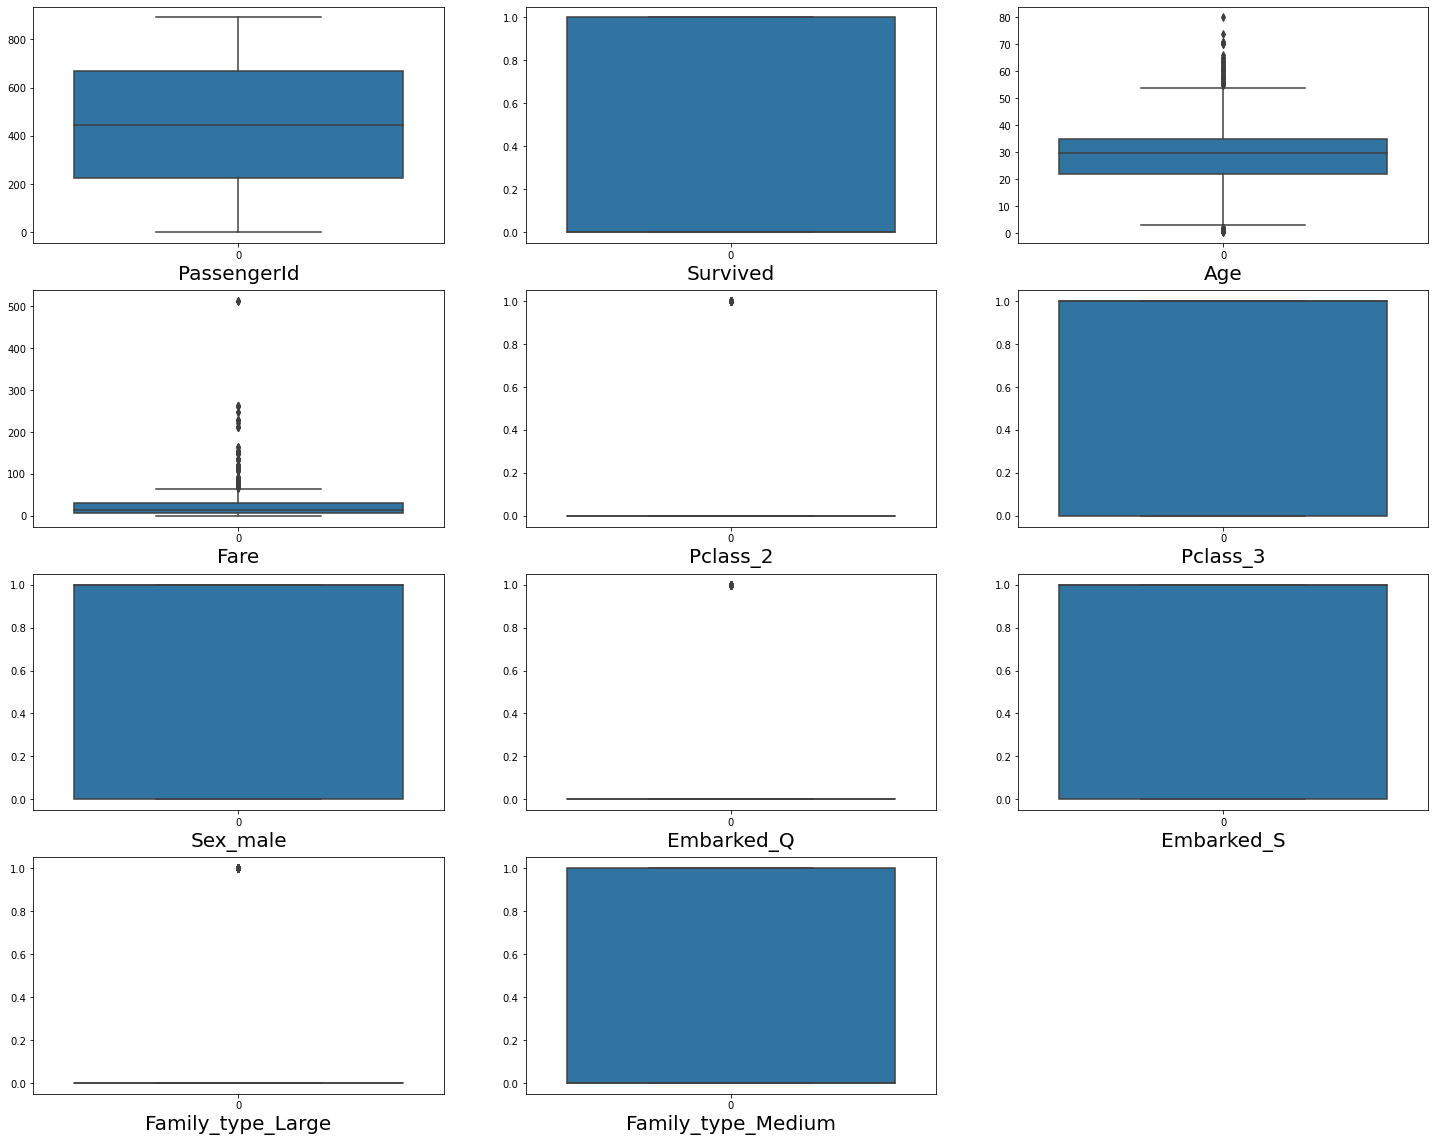

In [42]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in data:
    if plotnumber <=12:
        plt.subplot(4,3,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- We can see, almost all features is not having outliers.
- Age and Fare is having outliers.

### Removing Outliers

In [43]:
from scipy.stats import zscore

z_score = zscore(data[['Age','Fare']])
abs_z_score = np.abs(z_score)    

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]

df.shape

(864, 11)

### Percentage of data loss

In [44]:
data_loss = ((891 - 864)/891*100)
print(data_loss,'%')

3.0303030303030303 %


## Separating columns into features and label

In [45]:
# Passenger_Id is having 1% correlation with target colum so i drop this feature
x = df.drop(columns=['Survived','PassengerId'],axis=1)

y = df['Survived']

In [46]:
x.head(3)

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Medium
0,22.0,7.2500,0,1,1,0,1,0,1
1,38.0,71.2833,0,0,0,0,0,0,1
2,26.0,7.9250,0,1,0,0,1,0,0


In [47]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [48]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

### Transforming the data for removing skewness

In [49]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [50]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.56267593, -0.88276856, -0.51838448, ...,  0.60230891,
        -0.22885618,  1.38169856],
       [ 0.70295816,  1.5290383 , -0.51838448, ..., -1.66027761,
        -0.22885618,  1.38169856],
       [-0.23892784, -0.79244395, -0.51838448, ...,  0.60230891,
        -0.22885618, -0.72374686],
       ...,
       [ 0.05566474,  0.34527507, -0.51838448, ...,  0.60230891,
        -0.22885618,  1.38169856],
       [-0.23892784,  0.60798116, -0.51838448, ..., -1.66027761,
        -0.22885618, -0.72374686],
       [ 0.23686358, -0.81516677, -0.51838448, ..., -1.66027761,
        -0.22885618, -0.72374686]])

In [51]:
x.mean()  

-4.568819031379245e-19

In [52]:
x.std()

1.0

### Finding Best Random State

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [54]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8653846153846154 on Random State 415


### Balancing Datasaet

In [55]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=415)

In [57]:
ove_smp = SMOTE(1.0)

x_train_ns,y_train_ns = ove_smp.fit_sample(x_train,y_train)

print('The number of classes before fit {}'.format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 376, 1: 228})
The number of classes after fit Counter({0: 376, 1: 376})


## Model Building

### LogisticRegression

In [58]:
lr = LogisticRegression()
lr.fit(x_train_ns,y_train_ns)

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.8346153846153846

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
pred_lr = lr.predict(x_test)
accu = accuracy_score(y_test,pred_lr)

In [61]:
for j in range(4,10):
    cross = cross_val_score(lr,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 80.78703703703705
accuracy_score is:- 83.46153846153847


At cv:- 5
Cross validation score is:- 80.4409194784245
accuracy_score is:- 83.46153846153847


At cv:- 6
Cross validation score is:- 80.32407407407408
accuracy_score is:- 83.46153846153847


At cv:- 7
Cross validation score is:- 79.97545989284777
accuracy_score is:- 83.46153846153847


At cv:- 8
Cross validation score is:- 80.43981481481481
accuracy_score is:- 83.46153846153847


At cv:- 9
Cross validation score is:- 80.20833333333333
accuracy_score is:- 83.46153846153847




In [62]:
lsscore_selected = cross_val_score(lr,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8020833333333333 
The accuracy score is:  0.8346153846153846


In [63]:
def metric_score(clf, x_train_ns,x_test,y_train_ns,y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train_ns)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train_ns, y_pred) * 100:.2f}%")

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
        print('\n \n Confusion Matrix \n', confusion_matrix(y_test,pred))
    

In [64]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### Random Forest

In [65]:
rf = RandomForestClassifier()
rf.fit(x_train_ns,y_train_ns)

y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8153846153846154

In [66]:
metric_score(rf,x_train_ns,x_test,y_train_ns, y_test, train=True)

metric_score(rf,x_train_ns,x_test,y_train_ns, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 98.80%

==========================Test Result=======================
Accuracy Score: 81.54%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       161
           1       0.74      0.80      0.77        99

    accuracy                           0.82       260
   macro avg       0.80      0.81      0.81       260
weighted avg       0.82      0.82      0.82       260


 
 Confusion Matrix 
 [[133  28]
 [ 20  79]]


In [67]:
pred_rf = rf.predict(x_test)
accu = accuracy_score(y_test,pred_rf)

In [68]:
for j in range(4,10):
    cross = cross_val_score(rf,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 80.0925925925926
accuracy_score is:- 81.53846153846153


At cv:- 5
Cross validation score is:- 79.51875252050007
accuracy_score is:- 81.53846153846153


At cv:- 6
Cross validation score is:- 80.55555555555554
accuracy_score is:- 81.53846153846153


At cv:- 7
Cross validation score is:- 80.44471919373572
accuracy_score is:- 81.53846153846153


At cv:- 8
Cross validation score is:- 79.97685185185185
accuracy_score is:- 81.53846153846153


At cv:- 9
Cross validation score is:- 80.0925925925926
accuracy_score is:- 81.53846153846153




In [70]:
lsscore_selected = cross_val_score(rf,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8113971001461168 
The accuracy score is:  0.8153846153846154


### Hyperparameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
# RandomForestClassifier
params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}

grd = GridSearchCV(rf,param_grid = params)
grd.fit(x_train_ns,y_train_ns)

print('Best_params  = > ',grd.best_params_)

Best_params  = >  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [73]:
# reinstantiating with best params
rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=15)            

rf.fit(x_train_ns,y_train_ns)
metric_score(rf,x_train_ns,x_test,y_train_ns,y_test,train=True)  # Thiis is for training score

metric_score(rf,x_train_ns,x_test,y_train_ns,y_test,train=False)  



========================== Train Result=============================
Accuracy Score: 86.44%

==========================Test Result=======================
Accuracy Score: 83.85%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       161
           1       0.79      0.78      0.79        99

    accuracy                           0.84       260
   macro avg       0.83      0.83      0.83       260
weighted avg       0.84      0.84      0.84       260


 
 Confusion Matrix 
 [[141  20]
 [ 22  77]]


### Gradient Boosting Classifier

In [74]:
gbt=GradientBoostingClassifier()
gbt.fit(x_train_ns,y_train_ns)


y_pred = gbt.predict(x_test)
accuracy_score(y_test,y_pred)

0.8576923076923076

In [75]:
metric_score(gbt,x_train_ns,x_test,y_train_ns, y_test, train=True)

metric_score(gbt,x_train_ns,x_test,y_train_ns, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 89.10%

==========================Test Result=======================
Accuracy Score: 85.77%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       161
           1       0.82      0.81      0.81        99

    accuracy                           0.86       260
   macro avg       0.85      0.85      0.85       260
weighted avg       0.86      0.86      0.86       260


 
 Confusion Matrix 
 [[143  18]
 [ 19  80]]


In [76]:
pred_gbt = gbt.predict(x_test)

accu = accuracy_score(y_test,pred_gbt)
accu

0.8576923076923076

In [77]:
for j in range(4,10):
    cross = cross_val_score(gbt,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 82.06018518518518
accuracy_score is:- 85.76923076923076


At cv:- 5
Cross validation score is:- 81.13657749697539
accuracy_score is:- 85.76923076923076


At cv:- 6
Cross validation score is:- 81.71296296296296
accuracy_score is:- 85.76923076923076


At cv:- 7
Cross validation score is:- 81.36918811584428
accuracy_score is:- 85.76923076923076


At cv:- 8
Cross validation score is:- 81.59722222222223
accuracy_score is:- 85.76923076923076


At cv:- 9
Cross validation score is:- 81.71296296296296
accuracy_score is:- 85.76923076923076




In [78]:
lsscore_selected = cross_val_score(gbt,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8206018518518517 
The accuracy score is:  0.8576923076923076


### Hyperparameter Tuning

In [79]:
grid_param = {
    'max_depth': range(4,8),
    'min_samples_split': range(2,8,2),
    'learning_rate': np.arange(0.1,0.3)
}

In [80]:
grid = GridSearchCV(gbt, param_grid=grid_param)

grid.fit(x_train_ns,y_train_ns)

print(grid.best_estimator_)

GradientBoostingClassifier(max_depth=6, min_samples_split=4)


In [102]:
gbt = GradientBoostingClassifier(max_depth=3,min_samples_split=10, learning_rate=0.01)

gbt.fit(x_train_ns,y_train_ns)

metric_score(gbt,x_train_ns,x_test,y_train_ns,y_test, train=True)  # This is for training score

metric_score(gbt,x_train_ns,x_test,y_train_ns,y_test, train=False) # This is for testing score



========================== Train Result=============================
Accuracy Score: 81.78%

==========================Test Result=======================
Accuracy Score: 86.15%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       161
           1       0.82      0.81      0.82        99

    accuracy                           0.86       260
   macro avg       0.85      0.85      0.85       260
weighted avg       0.86      0.86      0.86       260


 
 Confusion Matrix 
 [[144  17]
 [ 19  80]]


 ###  XGBoost

In [103]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

xgb.fit(x_train_ns,y_train_ns)

metric_score(xgb,x_train_ns,x_test,y_train_ns, y_test, train=True)

metric_score(xgb,x_train_ns,x_test,y_train_ns, y_test, train=False)


[11:16:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

========================== Train Result=============================
Accuracy Score: 98.14%

==========================Test Result=======================
Accuracy Score: 79.23%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       161
           1       0.73      0.73      0.73        99

    accuracy                           0.79       260
   macro avg       0.78      0.78      0.78       260
weighted avg       0.79      0.79      0.79       260


 
 Confusion Matrix 
 [[134  27]
 [ 27  72]]


### DecisionTree

In [104]:
dt=DecisionTreeClassifier()
dt.fit(x_train_ns,y_train_ns)


y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.7961538461538461

In [105]:
metric_score(dt,x_train_ns,x_test,y_train_ns, y_test, train=True)

metric_score(dt,x_train_ns,x_test,y_train_ns, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 98.80%

==========================Test Result=======================
Accuracy Score: 79.62%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       161
           1       0.74      0.72      0.73        99

    accuracy                           0.80       260
   macro avg       0.78      0.78      0.78       260
weighted avg       0.80      0.80      0.80       260


 
 Confusion Matrix 
 [[136  25]
 [ 28  71]]


In [106]:
pred_dt = dt.predict(x_test)

accu = accuracy_score(y_test,pred_dt)

In [107]:
for j in range(4,10):
    cross = cross_val_score(dt,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 76.50462962962963
accuracy_score is:- 79.61538461538461


At cv:- 5
Cross validation score is:- 77.1998924586638
accuracy_score is:- 79.61538461538461


At cv:- 6
Cross validation score is:- 77.08333333333334
accuracy_score is:- 79.61538461538461


At cv:- 7
Cross validation score is:- 76.8620508785733
accuracy_score is:- 79.61538461538461


At cv:- 8
Cross validation score is:- 77.5462962962963
accuracy_score is:- 79.61538461538461


At cv:- 9
Cross validation score is:- 78.00925925925925
accuracy_score is:- 79.61538461538461




In [108]:
lsscore_selected = cross_val_score(dt,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7835648148148148 
The accuracy score is:  0.7961538461538461


### SVC

In [109]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_ns,y_train_ns)

metric_score(svc,x_train_ns,x_test,y_train_ns, y_test, train=True)

metric_score(svc,x_train_ns,x_test,y_train_ns, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 82.58%

==========================Test Result=======================
Accuracy Score: 83.85%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       161
           1       0.75      0.86      0.80        99

    accuracy                           0.84       260
   macro avg       0.83      0.84      0.83       260
weighted avg       0.85      0.84      0.84       260


 
 Confusion Matrix 
 [[133  28]
 [ 14  85]]


In [110]:
pred_svc = svc.predict(x_test)

accu = accuracy_score(y_test,pred_svc)

for j in range(4,10):
    cross = cross_val_score(svc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')


At cv:- 4
Cross validation score is:- 81.94444444444444
accuracy_score is:- 83.84615384615385


At cv:- 5
Cross validation score is:- 81.60034950934266
accuracy_score is:- 83.84615384615385


At cv:- 6
Cross validation score is:- 81.82870370370371
accuracy_score is:- 83.84615384615385


At cv:- 7
Cross validation score is:- 81.94428833689258
accuracy_score is:- 83.84615384615385


At cv:- 8
Cross validation score is:- 81.71296296296296
accuracy_score is:- 83.84615384615385


At cv:- 9
Cross validation score is:- 81.59722222222221
accuracy_score is:- 83.84615384615385




In [111]:
lsscore_selected = cross_val_score(svc,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8194444444444444 
The accuracy score is:  0.8384615384615385


### KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_ns,y_train_ns)

metric_score(knn,x_train_ns,x_test,y_train_ns, y_test, train=True)

metric_score(knn,x_train_ns,x_test,y_train_ns, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 86.70%

==========================Test Result=======================
Accuracy Score: 80.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       161
           1       0.70      0.82      0.76        99

    accuracy                           0.80       260
   macro avg       0.79      0.80      0.79       260
weighted avg       0.81      0.80      0.80       260


 
 Confusion Matrix 
 [[127  34]
 [ 18  81]]


In [113]:
pred_knn = knn.predict(x_test)

accu = accuracy_score(y_test,pred_knn)

In [114]:
for j in range(4,10):
    cross = cross_val_score(knn,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 80.90277777777779
accuracy_score is:- 80.0


At cv:- 5
Cross validation score is:- 81.25218443339158
accuracy_score is:- 80.0


At cv:- 6
Cross validation score is:- 80.78703703703704
accuracy_score is:- 80.0


At cv:- 7
Cross validation score is:- 81.14251995054514
accuracy_score is:- 80.0


At cv:- 8
Cross validation score is:- 81.25
accuracy_score is:- 80.0


At cv:- 9
Cross validation score is:- 81.48148148148148
accuracy_score is:- 80.0




In [115]:
lsscore_selected = cross_val_score(knn,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8148148148148148 
The accuracy score is:  0.8


### ROC_AUC Curve

In [116]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

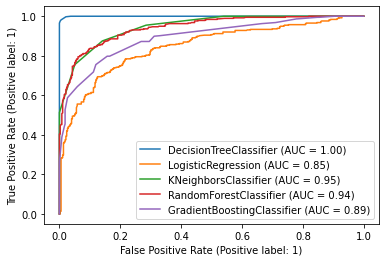

In [117]:
# AUC Curve For Training
disp = plot_roc_curve(dt,x_train_ns,y_train_ns)

plot_roc_curve(lr,x_train_ns,y_train_ns, ax=disp.ax_)

plot_roc_curve(knn,x_train_ns,y_train_ns, ax=disp.ax_)

plot_roc_curve(rf,x_train_ns,y_train_ns, ax=disp.ax_)

plot_roc_curve(gbt, x_train_ns,y_train_ns, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')

plt.show()

<Figure size 1440x1080 with 0 Axes>

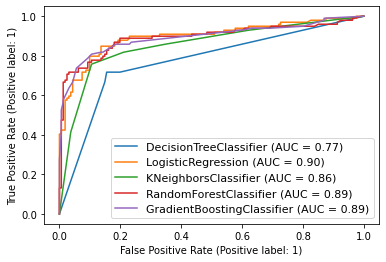

In [118]:
# AUC curve for testing

plt.figure(figsize=(20,15))

disp = plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(lr,x_test,y_test, ax=disp.ax_)

plot_roc_curve(knn,x_test,y_test, ax=disp.ax_)

plot_roc_curve(rf,x_test,y_test, ax=disp.ax_)

plot_roc_curve(gbt, x_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')

plt.show()

## Conclusion

### By using GradientBoosting Classifier, we are getting model accuracy as 86.15% which show our model is performing extremly well.

### Model Save

In [119]:
import pickle
titanic = 'Titanic.pkl'
pickle.dump(gbt, open(titanic, 'wb'))